In [1]:
# read ar marker sample
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("marker_sample.jpg")

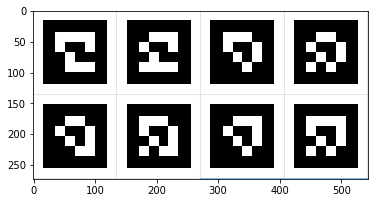

In [5]:
plt.imshow(img)
plt.show()

In [21]:
# 画像ファイルの読み込み
#inPath = 'hoge.jpg'
#outPath = 'hogehoge.jpg'
#img = cv2.imread(inPath)
img = cv2.imread("marker_sample.jpg")
# グレースケールに変換
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ガウシアンフィルタ
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
# 二値変換
ret, th = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
# エッジ抽出
img_canny = cv2.Canny(th, 50, 110)
# 輪郭抽出
ret, contours, hierarchy = cv2.findContours(img_canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

i = 0
while i < len(contours):
    approx = cv2.approxPolyDP(contours[i],8,True)
    cv2.polylines(img, [approx], True, (255, 0, 0), 3)
    if hierarchy[0][i][2] != -1 and approx.size == 8:
        sub = hierarchy[0][i][2]
        approx2 = cv2.approxPolyDP(contours[sub],8,True)
        #cv2.polylines(img, [approx2], True, (0, 255, 0), 3)
        if hierarchy[0][sub][2] != -1 and approx2.size == 8:
            sub2 = hierarchy[0][sub][2]
            approx3 = cv2.approxPolyDP(contours[sub2],8,True)
            if approx3.size == 6:
                cv2.polylines(img, [approx], True, (255, 0, 0), 3)
                cv2.polylines(img, [approx2], True, (0, 255, 0), 3)
                cv2.polylines(img, [approx3], True, (0, 0, 255), 3)
        i += 1
    i += 1

#cv2.imwrite(outPath, img)

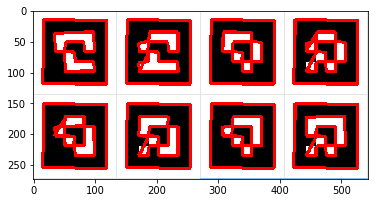

In [22]:
plt.imshow(img)
plt.show()